In [23]:
from datasets import load_dataset, inspect_dataset
import shutil
from datasets import load_dataset
import os
from PIL import Image


from datasets import load_dataset, inspect_dataset
import shutil
from datasets import load_dataset
import os
from PIL import Image


# Load the dataset
dataset = load_dataset("marcelomoreno26/geoguessr")

# location of the dataset
output_dir = "compressed_dataset"


# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
index = 0
list_set = ["train","test","validation"]
# Iterate over each example in the dataset
for cat in list_set:
    for example in dataset[cat]:  # Change "train" to the appropriate split
    # Check if the example contains an image and it's stored in a folder
        # Extract the image path and folder path
        folder_path = example["label"]

        image_path = f"newly add {index}.jpg"
        index += 1
        img = example["image"]
        # Construct the destination directory path
        destination_dir = os.path.join(output_dir, folder_path)

        # Create the destination directory if it doesn't exist
        os.makedirs(destination_dir, exist_ok=True)

        # Copy the image from the dataset folder to the destination directory
        output_path = os.path.join(destination_dir, image_path)
        img.save(output_path)
        print(output_path)

    print("Images extracted successfully.")

ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 0.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 1.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 2.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 3.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 4.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 5.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 6.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 7.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 8.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 9.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 10.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 11.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 12.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 13.jpg
ECE460J-GeoGuessr-/compressed_dataset/Argentina/newly add 14.jpg
ECE460J-GeoGuessr-/compressed_datas

KeyboardInterrupt: 

In [33]:
import re
import os
import pathlib

data_path = "compressed_dataset/"
pattern = re.compile(r"^newly add \d+\.jpg$")  # Corrected regular expression
count = 0

for country in os.listdir(data_path):
    if country == ".DS_Store":
        continue  
    country_path = os.path.join(data_path, country)
    for img in os.listdir(country_path):
        if pattern.match(img):
            file_path = os.path.join(country_path, img)
            if os.path.isfile(file_path):
                print(file_path)
                os.remove(file_path)
                count += 1

print('finished deleting data. Deleted', count, 'files')


compressed_dataset/Kenya/newly add 14029.jpg
compressed_dataset/Kenya/newly add 14038.jpg
compressed_dataset/Kenya/newly add 14039.jpg
compressed_dataset/Kenya/newly add 14089.jpg
compressed_dataset/Kenya/newly add 14076.jpg
compressed_dataset/Kenya/newly add 14062.jpg
compressed_dataset/Kenya/newly add 14102.jpg
compressed_dataset/Kenya/newly add 14116.jpg
compressed_dataset/Kenya/newly add 14117.jpg
compressed_dataset/Kenya/newly add 14103.jpg
compressed_dataset/Kenya/newly add 14063.jpg
compressed_dataset/Kenya/newly add 14077.jpg
compressed_dataset/Kenya/newly add 14088.jpg
compressed_dataset/Kenya/newly add 14049.jpg
compressed_dataset/Kenya/newly add 14061.jpg
compressed_dataset/Kenya/newly add 14075.jpg
compressed_dataset/Kenya/newly add 14115.jpg
compressed_dataset/Kenya/newly add 14101.jpg
compressed_dataset/Kenya/newly add 14100.jpg
compressed_dataset/Kenya/newly add 14114.jpg
compressed_dataset/Kenya/newly add 14074.jpg
compressed_dataset/Kenya/newly add 14060.jpg
compressed

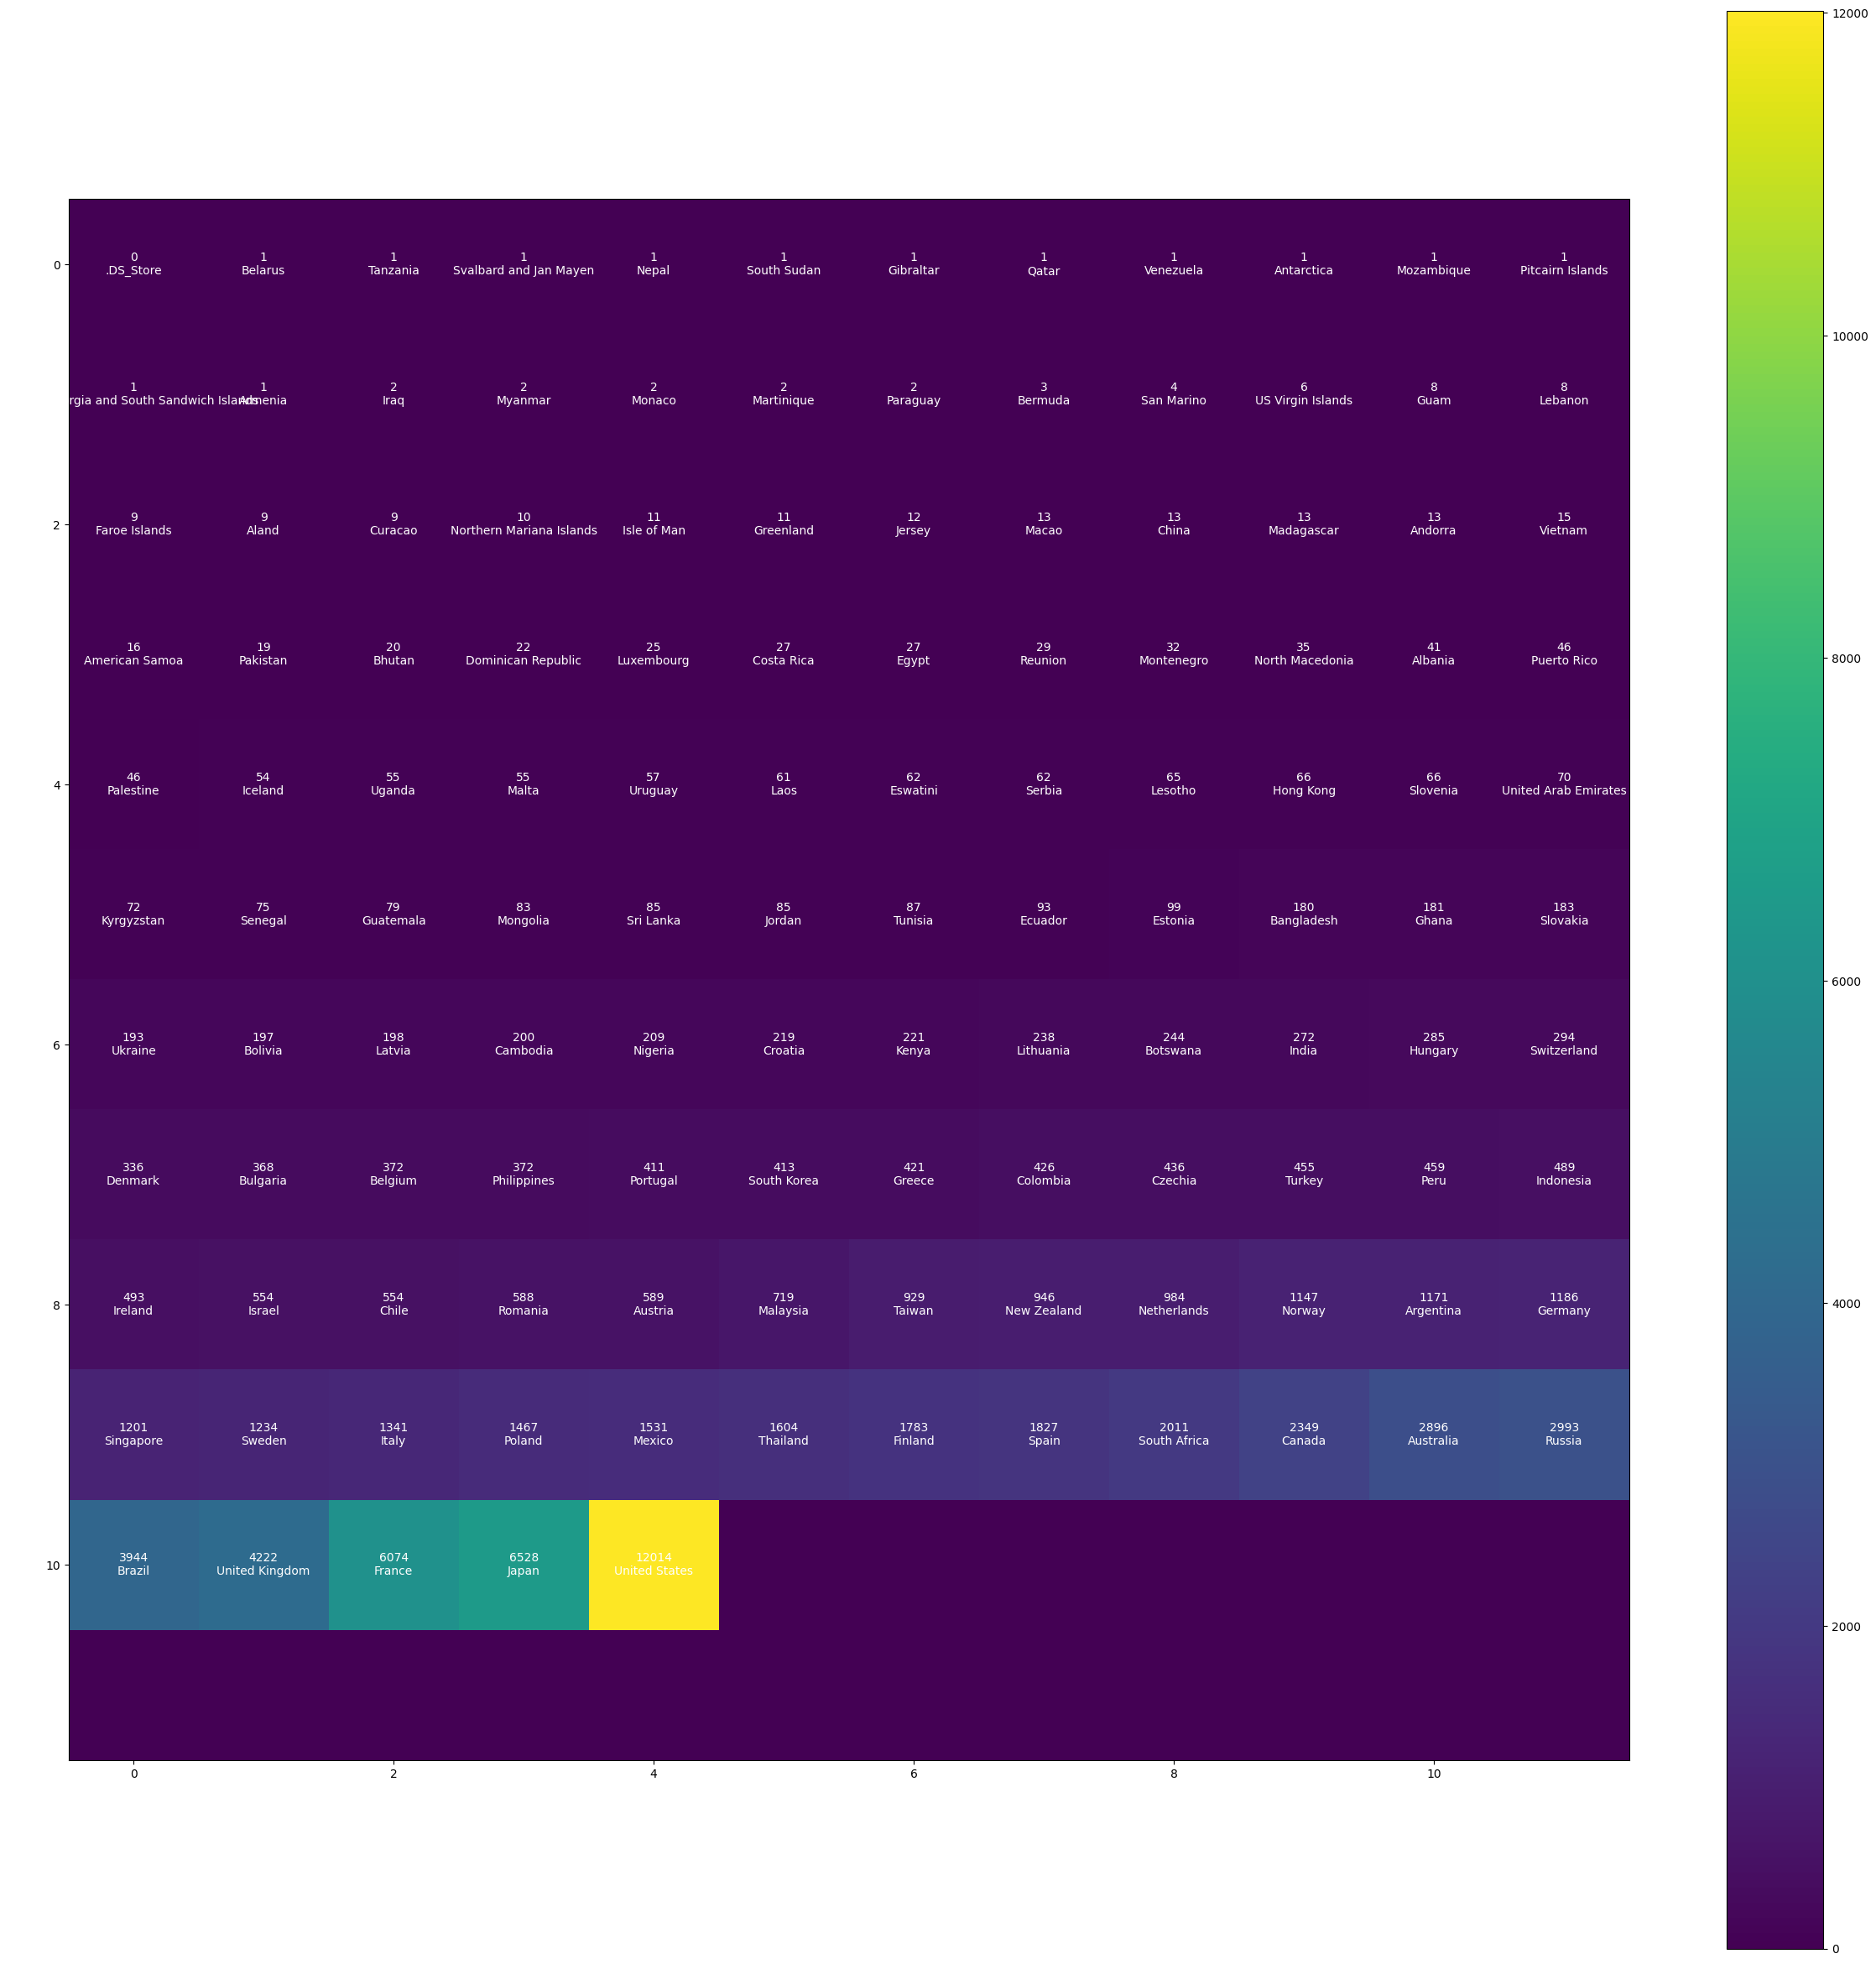

In [20]:

from math import sqrt, ceil
import numpy as np
import matplotlib.pyplot as plt
import pathlib

data_path = pathlib.Path("/Users/jw56255/ECE460J-GeoGuessr-/compressed_dataset")
def count_samples(path):
    return path.name, len(list(path.glob('*')))

zipped_data_distribution = list(map(count_samples, data_path.glob('*/')))

# Sort the zipped_data_distribution based on the number of pictures
zipped_data_distribution.sort(key=lambda x: x[1])

# Extract labels and numbers
labels = [item[0] for item in zipped_data_distribution]
numbers = [item[1] for item in zipped_data_distribution]
grid_size = ceil(sqrt(len(labels)))

grid = np.zeros((grid_size, grid_size), dtype=int)
for i, num in enumerate(numbers):
    row = i // grid_size
    col = i % grid_size
    grid[row, col] = num
 
# Create the heatmap
plt.figure(figsize=(30, 30))  # Set the size of the figure (width, height)
plt.imshow(grid, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add color bar

# Add annotations
for i in range(grid_size):
    for j in range(grid_size):
        if(i*grid_size+j<len(labels)):
            plt.text(j, i, f'{grid[i, j]}\n{labels[i*grid_size+j]}', ha='center', va='center', color='white')

plt.show()



